In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [2]:
lbc = load_breast_cancer()

## Building Dataframe from loaded dataset

In [3]:
df = pd.DataFrame(lbc.data, columns = lbc.feature_names)
df['target'] = lbc.target

## Dataset's description

In [4]:
print(lbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
X = df.drop(['target'],axis=1)
y = df['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Spliting with Stratify
Stratify gets us equal proportion in train and test...

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 43, stratify = y) 

# stratify will make split in equal proportion of 1 and 0 across train,test 

In [8]:
print(y_train.value_counts(normalize=True)*100)

target
1    62.637363
0    37.362637
Name: proportion, dtype: float64


In [9]:
print(y_test.value_counts(normalize=True)*100)

target
1    63.157895
0    36.842105
Name: proportion, dtype: float64


## Standardization 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
stdsc = StandardScaler()

In [12]:
X_train_std = stdsc.fit_transform(X_train) # fit only on train data...
X_test_std = stdsc.transform(X_test)       # only transform, donot fit on test

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

## Model Build

In [14]:
model.fit(X_train_std, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(X_test_std)

## Model Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
acc = accuracy_score(y_test, y_pred)

In [18]:
acc

0.956140350877193

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  4],
       [ 1, 71]])

In [20]:
report = classification_report(y_test, y_pred)

print(f'Accuracy Score: {acc}')
print(f'Classification Report is: \n{report}')

Accuracy Score: 0.956140350877193
Classification Report is: 
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



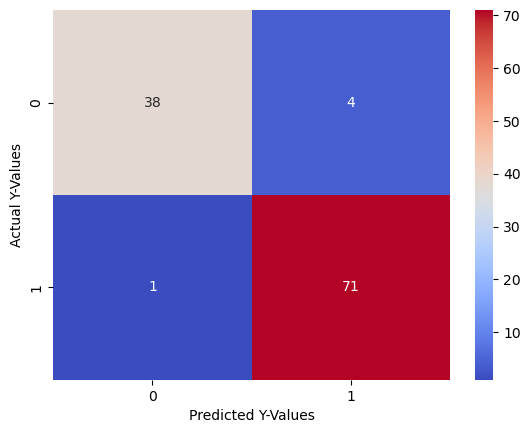

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data= cm, annot=True, cmap= 'coolwarm')
plt.xlabel('Predicted Y-Values')
plt.ylabel('Actual Y-Values')
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score , roc_curve


In [23]:
# ROC curve is graph between FPR (False Pos. Rate) & TPR (True Pos. Rate)
# ROC AUC is area under curve of ROC 
y_pred_prob = model.predict_proba(X_test_std)[:,0]
y_pred_prob

array([9.99999389e-01, 2.77711577e-02, 9.99892317e-01, 9.93664889e-01,
       2.69291115e-04, 9.64823277e-01, 9.87305574e-01, 8.89271903e-04,
       4.98971145e-06, 5.84858671e-02, 9.99982538e-01, 1.49224443e-03,
       4.98140534e-01, 4.92753855e-04, 7.73508852e-06, 2.39800682e-02,
       9.99999325e-01, 4.37908808e-01, 5.79990906e-03, 8.48033220e-05,
       2.74124301e-03, 4.11894757e-05, 1.70959292e-03, 2.24174620e-03,
       9.99893102e-01, 9.86814372e-01, 9.97763881e-01, 1.85275081e-05,
       1.16052257e-03, 1.46592655e-03, 2.69910386e-04, 8.87474468e-04,
       9.59425497e-03, 4.08165817e-04, 1.17559680e-05, 9.98635897e-01,
       9.06300979e-02, 9.99686493e-01, 2.88653585e-05, 4.12966394e-02,
       1.06638374e-01, 8.54880038e-02, 8.59400939e-02, 2.66387670e-03,
       6.33774996e-05, 9.96502616e-01, 9.98810795e-01, 7.68937407e-01,
       9.50416969e-03, 3.18740184e-04, 2.17001752e-04, 9.83260518e-01,
       9.98705769e-01, 1.58916522e-02, 4.62807638e-06, 1.45992383e-02,
      

#### Refer to notes for fpr, tpr, roc...

TPR - true positive rate, recall (sensitivity)

FPR - false positive rate, 1-specificity

In [24]:
fpr , tpr , threshold = roc_curve(y_true = y_test, y_score = y_pred_prob , pos_label=0)

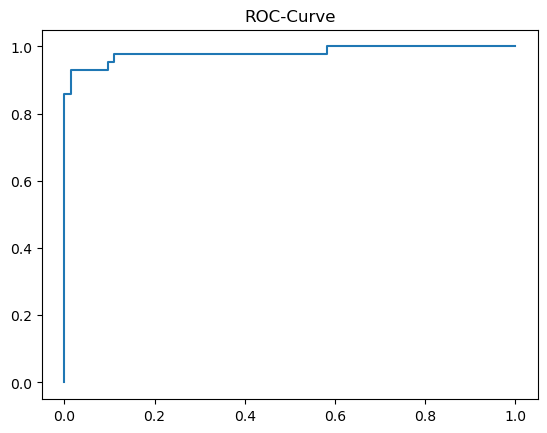

In [25]:
plt.plot(fpr, tpr)
plt.title('ROC-Curve')
plt.show()

In [26]:
# labels are reversed...0 is malignant , usually consideres 1 as true, here its 0, so 1-roc

roc_score = 1 - roc_auc_score(y_true = y_test, y_score = y_pred_prob) 

roc_score

0.9801587301587301

## Using SGDClassifier - Stochastic Gradient Descent 

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
# Linear classifiers (SVM, logistic regression, etc.) with SGD training

sgd_class = SGDClassifier( loss = 'log_loss')

In [29]:
param_grid = {  'penalty' : ['l1','l2','elasticnet'],
                'alpha' : [0.01,0.4, 10,100, 1000],
                'l1_ratio' : [0 , 1, 0.2, 0.8, 0.6],
                'learning_rate' : ['adaptive','constant'],
                'eta0' : [ 0.1, 0.8, 1, 0.4, 10 ] ,
}

### Params explained

learning_rate : Controls how step size changes

penalty : Regularization penalty, l1,l2,elasticnet

alpha : Regularization strength (λ)lambda , Opposite of C in SVM , Larger alpha → stronger regularization → simpler model

l1_ratio : mix ratio of l1, l2... if 0=pure l2

max_iter : max num of passes over dataset

eta0 : to define initial learning rate (used when learning_rate=constant,adaptive)

learning_rate

'constant'	Fixed learning rate

'adaptive'	Reduce when loss stops improving

'optimal'	Theoretical default

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
gridsearch = GridSearchCV( estimator = sgd_class, 
                          param_grid = param_grid, 
                          scoring = 'recall', 
                          cv = 5)

In [32]:
gridsearch.fit(X_train_std, y_train)

,estimator,SGDClassifier(loss='log_loss')
,param_grid,"{'alpha': [0.01, 0.4, ...], 'eta0': [0.1, 0.8, ...], 'l1_ratio': [0, 1, ...], 'learning_rate': ['adaptive', 'constant'], ...}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [33]:
best = gridsearch.best_estimator_
best

,loss,'log_loss'
,penalty,'l1'
,alpha,0.01
,l1_ratio,1
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [34]:
gridsearch.best_params_

{'alpha': 0.01,
 'eta0': 0.1,
 'l1_ratio': 1,
 'learning_rate': 'constant',
 'penalty': 'l1'}

In [35]:
y_pred = best.predict(X_test_std)

In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [37]:
randomsearch = RandomizedSearchCV(estimator = sgd_class,
                                 param_distributions= param_grid,
                                 n_iter = 10,
                                 scoring = 'f1',
                                 random_state = 42,
                                 cv = 5
                                 )

In [38]:
randomsearch.fit(X_train_std , y_train)

,estimator,SGDClassifier(loss='log_loss')
,param_distributions,"{'alpha': [0.01, 0.4, ...], 'eta0': [0.1, 0.8, ...], 'l1_ratio': [0, 1, ...], 'learning_rate': ['adaptive', 'constant'], ...}"
,n_iter,10
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [39]:
best2 = randomsearch.best_estimator_
best2

,loss,'log_loss'
,penalty,'l2'
,alpha,0.01
,l1_ratio,0.2
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [40]:
y_pred = best2.predict(X_test_std)

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Manual K-fold Split

In [42]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
train_df, test_df = train_test_split(df , test_size = 0.2, random_state=42)

In [44]:
# shuffling of train data 

train_shuffle = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_shuffle.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368,0
1,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,25.94,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,1
2,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,1
3,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1
4,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0


In [45]:
# add a k-fold col to identify the specific row is in which k-fold...

train_shuffle['kfold'] = 999
train_shuffle.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kfold
0,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368,0,999
1,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,1,999
2,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,1,999
3,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1,999
4,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0,999


In [46]:
from sklearn.model_selection import KFold

In [47]:
kf = KFold()  # default no. of splits = 5

In [48]:
# after split rach fold should have this no. of data

train_shuffle.shape[0]//5

91

In [49]:
for fold,(train_index, val_index) in enumerate(kf.split(train_shuffle), start=1):

    print('fold no. :', fold )
    print('-'*100)

    print('Train data index :\n', train_index)
    print()
    print('Validation data index :\n' ,val_index)
    

fold no. : 1
----------------------------------------------------------------------------------------------------
Train data index :
 [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 30

In [50]:
# we give numbering inside kfold col. we made previosuly...
# we assign fold number to rows of val_index, not to all...as per 1 iter of enumerate, it goes to actual test data and assign the perticular fold number. 

for fold,(train_index, val_index) in enumerate(kf.split(train_shuffle), start=1):

    train_shuffle.loc[val_index ,['kfold'] ] = fold  # selects only specifc iteration's val/test data and give number of fold
    
train_shuffle.head()  

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kfold
0,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368,0,1
1,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,1,1
2,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,1,1
3,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1,1
4,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0,1


In [51]:
train_shuffle['kfold'].value_counts()

kfold
1    91
2    91
3    91
4    91
5    91
Name: count, dtype: int64

In [52]:
# proportion of 1 and 0 in each folds

train_shuffle.groupby('kfold')['target'].value_counts()

kfold  target
1      1         55
       0         36
2      1         59
       0         32
3      1         51
       0         40
4      1         60
       0         31
5      1         61
       0         30
Name: count, dtype: int64

## Manual Stratified K-fold

Equal proprtion split, all splits will have train and test split in equal ratio/proportion

In [53]:
train_shuffle.drop(columns = 'kfold', inplace=True)

In [54]:
train_shuffle.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368,0
1,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,25.94,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,1
2,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,1
3,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1
4,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0


In [55]:
from sklearn.model_selection import StratifiedKFold

In [56]:
skf = StratifiedKFold()

#### We add a col 'skfold' for naming in which stratified fold is the row/observation

In [57]:
for fold,(train_index, val_index) in enumerate(skf.split(train_shuffle , train_shuffle['target']), start=1):

    train_shuffle.loc[val_index ,['skfold'] ] = fold
train_shuffle.head()    

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,skfold
0,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368,0,1.0
1,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,1,1.0
2,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,1,1.0
3,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1,1.0
4,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0,1.0


In [58]:
# checking proportion of all folds

train_shuffle.groupby('skfold')['target'].value_counts()

skfold  target
1.0     1         57
        0         34
2.0     1         57
        0         34
3.0     1         57
        0         34
4.0     1         57
        0         34
5.0     1         58
        0         33
Name: count, dtype: int64

In [59]:
sgd_class = SGDClassifier(loss = 'log_loss')

In [60]:
train_shuffle.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'skfold'],
      dtype='object')

In [61]:
X_vars = [vars for vars in train_shuffle.columns if vars not in ['target','skfold'] ]

In [62]:
final_pred = []
for fold in range(1,6):

    train = train_shuffle[train_shuffle['skfold'] != fold]
    val = train_shuffle[train_shuffle['skfold'] == fold]

    X_train = train[X_vars]
    X_val = val[X_vars]

    y_train = train['target']
    y_val = val['target']

    stdsc = StandardScaler()
    
    X_train_std = stdsc.fit_transform(X_train)
    X_val_std = stdsc.transform(X_val)
    
    sgd_class.fit(X_train_std, y_train)

    y_pred = sgd_class.predict(X_val_std)

    print(y_pred)
    final_pred.append(y_pred)

    acc = accuracy_score(y_val, y_pred)

    print(f'Accuracy for fold {fold}: {acc}\n')

[0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 1: 0.967032967032967

[0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0]
Accuracy for fold 2: 0.967032967032967

[1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 3: 0.978021978021978

[0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 4: 0.967032967032967

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 0 1 

In [64]:
test_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


In [65]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,24.22,31.59,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368
1,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,15.10,25.94,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603
2,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,13.80,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262
3,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
4,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701


### Use test data 'test_df' for getting prediction on test data

In [72]:
final_pred = []
X_test = test_df.drop(columns='target')
for fold in range(1,6):

    train = train_shuffle[train_shuffle['skfold'] != fold]
    val = train_shuffle[train_shuffle['skfold'] == fold]

    X_train = train[X_vars]
    X_val = val[X_vars]
    
    y_train = train['target']
    y_val = val['target']

    stdsc = StandardScaler()
    
    X_train_std = stdsc.fit_transform(X_train)
    X_val_std = stdsc.transform(X_val)
    X_test_std = stdsc.transform(X_test)
     
    sgd_class.fit(X_train_std, y_train)

    y_pred = sgd_class.predict(X_val_std)

    print(y_pred)

    final_ypred = sgd_class.predict(X_test_std)
    
    final_pred.append(final_ypred)

    acc = accuracy_score(y_val, y_pred)

    print(f'Accuracy for fold {fold}: {acc}\n')


[0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 1: 0.967032967032967

[0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0]
Accuracy for fold 2: 0.967032967032967

[1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 3: 0.9560439560439561

[0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
Accuracy for fold 4: 0.9560439560439561

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 1 

In [73]:
print(final_pred)

[array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0]), array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0]), array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0

In [76]:
X_test.shape

(114, 30)

In [82]:
np.array(final_pred).shape

(5, 114)

#### We got prediction on test data, but we get 5 predictions of each model who learned from diff 5 folds

We sum up the values , then if we occurence of '1' three or more times means we keep it as 1, otherwise 0...



In [84]:
np.sum(np.array(final_pred), axis=0)

array([5, 0, 0, 5, 5, 0, 0, 0, 1, 5, 5, 0, 5, 3, 5, 0, 5, 5, 5, 0, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 5, 0, 5, 5, 0, 5, 5,
       4, 5, 5, 5, 5, 5, 0, 0, 1, 5, 5, 5, 5, 0, 0, 5, 5, 0, 0, 5, 5, 5,
       0, 0, 5, 5, 0, 0, 5, 0, 5, 5, 5, 2, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0,
       5, 5, 5, 2, 5, 5, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5, 4, 5, 0, 5, 5,
       0, 5, 3, 0])

In [87]:
# making 1 where its 3 or more...

fy_pred = (np.sum(np.array(final_pred), axis=0)>=3).astype('int')
fy_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### Evaluating against test data with final predictions we got from k-folded model's predictions

note - didn't do hyperparameter tuning here...

we used default params, SGDClassifier(loss='log_loss')

In [86]:
y_test = test_df['target']
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int64

In [89]:
final_acc = accuracy_score(y_test, fy_pred)
final_acc

0.956140350877193

In [90]:
report = classification_report(y_test, fy_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Doing HyperParameter Tuning inside K-fold

In [102]:
sgd_class = SGDClassifier(loss='log_loss')

grid_param = { 'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha' : [0.001, 0.1,0.5,0.8, 1] ,
    'l1_ratio' : [0, 0.1, 0.2, 0.8, 1],
    'learning_rate' : ['constant','adaptive','optimal'],
    'eta0' : [0.1,1]
}

gs = GridSearchCV(estimator = sgd_class, param_grid = grid_param, scoring = 'accuracy', n_jobs=-1, cv=5)

X_tr= train_shuffle.drop(columns=['target','skfold'])    
X_tr_std = stdsc.fit_transform(X_tr)
y_tr = train_shuffle['target']

X_te = test_df.drop(columns='target')
X_te_std = stdsc.transform(X_te)

gs.fit(X_tr_std, y_tr)

best_model = gs.best_estimator_
print(best_model)

SGDClassifier(alpha=0.001, eta0=0.1, l1_ratio=0.1, learning_rate='constant',
              loss='log_loss', penalty='l1')


In [105]:
final_pred = []
X_test = test_df.drop(columns='target')
for fold in range(1,6):

    train = train_shuffle[train_shuffle['skfold'] != fold]
    val = train_shuffle[train_shuffle['skfold'] == fold]

    X_train = train[X_vars]
    X_val = val[X_vars]
    
    y_train = train['target']
    y_val = val['target']

    stdsc = StandardScaler()
    
    X_train_std = stdsc.fit_transform(X_train)
    X_val_std = stdsc.transform(X_val)
    X_test_std = stdsc.transform(X_test)
     
    best_model.fit(X_train_std, y_train)

    y_pred = best_model.predict(X_val_std)

    print(y_pred)

    final_ypred = best_model.predict(X_test_std)
    
    final_pred.append(final_ypred)

    acc = accuracy_score(y_val, y_pred)

    print(f'Accuracy for fold {fold}: {acc}\n')


[0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 1: 0.9560439560439561

[0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0]
Accuracy for fold 2: 0.978021978021978

[1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 3: 1.0

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy for fold 4: 0.978021978021978

[0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1

In [106]:
# making 1 where its 3 or more...

fy_pred = (np.sum(np.array(final_pred), axis=0)>=3).astype('int')
fy_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [107]:
y_test = test_df['target']
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int64

In [108]:
final_acc = accuracy_score(y_test, fy_pred)
final_acc

0.9824561403508771